In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
data = open('/content/EAPoe_Poems.txt').read()
data

'\nTHE RAVEN.\n\n\n  Once upon a midnight dreary, while I pondered, weak and weary,\n  Over many a quaint and curious volume of forgotten lore--\n  While I nodded, nearly napping, suddenly there came a tapping,\n  As of some one gently rapping--rapping at my chamber door.\n  "\'Tis some visitor," I muttered, "tapping at my chamber door--\n          Only this and nothing more."\n\n  Ah, distinctly I remember, it was in the bleak December,\n  And each separate dying ember wrought its ghost upon the floor.\n  Eagerly I wished the morrow;--vainly I had sought to borrow\n  From my books surcease of sorrow--sorrow for the lost Lenore--\n  For the rare and radiant maiden whom the angels name Lenore--\n          Nameless here for evermore.\n\n  And the silken sad uncertain rustling of each purple curtain\n  Thrilled me--filled me with fantastic terrors never felt before;\n  So that now, to still the beating of my heart, I stood repeating\n  "\'Tis some visitor entreating entrance at my chamber

In [ ]:
corpus = data.lower().split("\n")
corpus

['',
 'the raven.',
 '',
 '',
 '  once upon a midnight dreary, while i pondered, weak and weary,',
 '  over many a quaint and curious volume of forgotten lore--',
 '  while i nodded, nearly napping, suddenly there came a tapping,',
 '  as of some one gently rapping--rapping at my chamber door.',
 '  "\'tis some visitor," i muttered, "tapping at my chamber door--',
 '          only this and nothing more."',
 '',
 '  ah, distinctly i remember, it was in the bleak december,',
 '  and each separate dying ember wrought its ghost upon the floor.',
 '  eagerly i wished the morrow;--vainly i had sought to borrow',
 '  from my books surcease of sorrow--sorrow for the lost lenore--',
 '  for the rare and radiant maiden whom the angels name lenore--',
 '          nameless here for evermore.',
 '',
 '  and the silken sad uncertain rustling of each purple curtain',
 '  thrilled me--filled me with fantastic terrors never felt before;',
 '  so that now, to still the beating of my heart, i stood repea

In [ ]:
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [ ]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'of': 3, 'in': 4, 'a': 5, 'to': 6, 'i': 7, 'that': 8, 'my': 9, 'not': 10, 'it': 11, 'with': 12, 'is': 13, 'for': 14, 'me': 15, 'from': 16, 'on': 17, 'thy': 18, 'all': 19, 'her': 20, 'but': 21, 'as': 22, 'was': 23, 'thou': 24, 'by': 25, 'so': 26, 'be': 27, 'thee': 28, 'have': 29, 'this': 30, 'no': 31, 'now': 32, 'at': 33, 'his': 34, 'upon': 35, 'bells': 36, 'love': 37, 'which': 38, 'its': 39, 'their': 40, 'what': 41, 'are': 42, 'they': 43, 'you': 44, 'more': 45, 'there': 46, 'night': 47, 'he': 48, 'like': 49, 'we': 50, 'an': 51, 'heart': 52, 'who': 53, 'heaven': 54, 'how': 55, 'then': 56, 'light': 57, 'were': 58, 'one': 59, 'she': 60, 'down': 61, 'soul': 62, 'or': 63, 'will': 64, 'when': 65, 'where': 66, 'hath': 67, 'time': 68, 'politian': 69, 'yet': 70, 'shall': 71, 'oh': 72, 'than': 73, 'most': 74, 'spirit': 75, 'still': 76, 'dream': 77, 'while': 78, 'out': 79, 'thus': 80, 'o': 81, 'some': 82, 'let': 83, 'eyes': 84, 'beauty': 85, 'may': 86, 'within': 87, 'did': 88

In [ ]:
print(tokenizer.word_index['once'])
print(tokenizer.word_index['upon'])
print(tokenizer.word_index['midnight'])

223
35
430


In [ ]:
print(total_words)

4196


In [ ]:
input_sequences = []

for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

input_sequences

[[1, 248],
 [223, 35],
 [223, 35, 5],
 [223, 35, 5, 430],
 [223, 35, 5, 430, 1989],
 [223, 35, 5, 430, 1989, 78],
 [223, 35, 5, 430, 1989, 78, 7],
 [223, 35, 5, 430, 1989, 78, 7, 1990],
 [223, 35, 5, 430, 1989, 78, 7, 1990, 728],
 [223, 35, 5, 430, 1989, 78, 7, 1990, 728, 2],
 [223, 35, 5, 430, 1989, 78, 7, 1990, 728, 2, 590],
 [153, 119],
 [153, 119, 5],
 [153, 119, 5, 1268],
 [153, 119, 5, 1268, 2],
 [153, 119, 5, 1268, 2, 913],
 [153, 119, 5, 1268, 2, 913, 379],
 [153, 119, 5, 1268, 2, 913, 379, 3],
 [153, 119, 5, 1268, 2, 913, 379, 3, 591],
 [153, 119, 5, 1268, 2, 913, 379, 3, 591, 592],
 [78, 7],
 [78, 7, 1991],
 [78, 7, 1991, 914],
 [78, 7, 1991, 914, 1269],
 [78, 7, 1991, 914, 1269, 915],
 [78, 7, 1991, 914, 1269, 915, 46],
 [78, 7, 1991, 914, 1269, 915, 46, 196],
 [78, 7, 1991, 914, 1269, 915, 46, 196, 5],
 [78, 7, 1991, 914, 1269, 915, 46, 196, 5, 593],
 [22, 3],
 [22, 3, 82],
 [22, 3, 82, 59],
 [22, 3, 82, 59, 508],
 [22, 3, 82, 59, 508, 916],
 [22, 3, 82, 59, 508, 916, 916],

In [ ]:
# Pad sequences so that they have the same length
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences

array([[  0,   0,   0, ...,   0,   1, 248],
       [  0,   0,   0, ...,   0, 223,  35],
       [  0,   0,   0, ..., 223,  35,   5],
       ...,
       [  0,   0,   0, ...,   2, 308, 127],
       [  0,   0,   0, ..., 308, 127,   3],
       [  0,   0,   0, ..., 127,   3, 264]], dtype=int32)

In [ ]:
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0    0  223   35    5  430
 1989]
[0. 0. 0. ... 0. 0. 0.]


## Model

adapted from [this TensorFlow tutorial](https://www.youtube.com/playlist?list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S)

In [ ]:
model = Sequential()

model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) 
model.add(Bidirectional(LSTM(150)))
model.add(Dropout(0.2))
model.add(Dense(total_words, activation='softmax'))

#earlystop = EarlyStopping(monitor='accuracy', patience=3)

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           419600    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 4196)              1262996   
Total params: 1,983,796
Trainable params: 1,983,796
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(xs, ys, epochs=50)

Epoch 1/50
640/640 [==============================] - 7s 11ms/step - loss: 6.9057 - accuracy: 0.0686
Epoch 2/50
640/640 [==============================] - 7s 10ms/step - loss: 6.4475 - accuracy: 0.0815
Epoch 3/50
640/640 [==============================] - 7s 11ms/step - loss: 6.1518 - accuracy: 0.0905
Epoch 4/50
640/640 [==============================] - 7s 11ms/step - loss: 5.8294 - accuracy: 0.1074
Epoch 5/50
640/640 [==============================] - 7s 11ms/step - loss: 5.4920 - accuracy: 0.1228
Epoch 6/50
640/640 [==============================] - 7s 10ms/step - loss: 5.1631 - accuracy: 0.1354
Epoch 7/50
640/640 [==============================] - 7s 10ms/step - loss: 4.8326 - accuracy: 0.1537
Epoch 8/50
640/640 [==============================] - 7s 11ms/step - loss: 4.5004 - accuracy: 0.1806
Epoch 9/50
640/640 [==============================] - 7s 11ms/step - loss: 4.1840 - accuracy: 0.2086
Epoch 10/50
640/640 [==============================] - 7s 11ms/step - loss: 3.8708 - accura

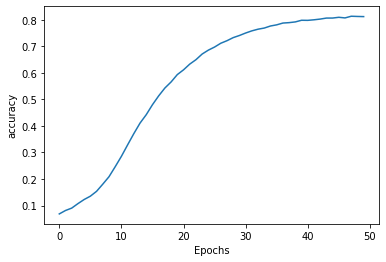

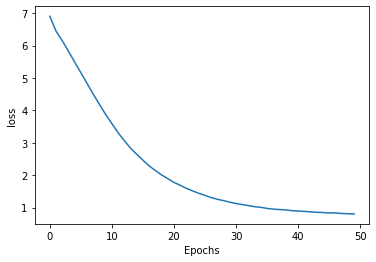

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Testing: text generation

In [ ]:
seed_text = "Once upon"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(seed_text)

Once upon the velvet sinking i betook myself to linking 3 thee to be mrs s osgood don it it elm did adore hasty 'the humbler conclusion humbler downward crystalline fire ed 'the sent lenore 'the 'the outpour outpour outpour once did 'the 'the humbler ephemeral firm he he mean rapping saw the moon he do caves and level above the floor door of the poet's triune tribute to mrs mrs osgood appears to clemm was sent in 'the in burton's 'gentleman's and dull nature's level tale the 'the after the floor and the spoken who do the editor's others of the


In [ ]:
seed_text = ""
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

seed_text

" ah night of all nights in the year and untruest above how song above my first door of it is it be the whispered word lenore bore her garden they is published as the somewhat resting such of this purple isle gentle low door and truth is chilly and this poem is this admiration words sent to speak the fifth you do me politian is thou shalt not an lasting not so given pouts expression expression you well precipitate precipitate least's fog vapors sign of our journey for poe he labor at a glow ago to this passed as a"

In [ ]:
seed_text = ""
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(seed_text)

 in the hatred of a minute the hour at my eye who has at least one door of vigilance beside the floor despite of the floor after the poem in the city in the new york 'tribune' before before the new 'the before a hasty 'the above darest wars firm
